# Housing Prices Competition for Kaggle Learn Users

My attempt at this [competition](https://www.kaggle.com/competitions/home-data-for-ml-course/data)

In [4]:
import sys
!{sys.executable} -m pip install --upgrade kaggle
!conda install -c conda-forge kaggle

/bin/sh: 1: conda: not found


## Download Data

In [7]:
!/home/pj/.local/bin/kaggle competitions download -c home-data-for-ml-course

import zipfile
with zipfile.ZipFile("home-data-for-ml-course.zip","r") as zip_ref:
    zip_ref.extractall("home-data-for-ml-course")

  0%|                                                | 0.00/386k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 386k/386k [00:00<00:00, 9.10MB/s]


In [8]:
import numpy as np
import pandas as pd

In [10]:
train_data_raw = pd.read_csv('home-data-for-ml-course/train.csv')
test_data_raw = pd.read_csv('home-data-for-ml-course/test.csv')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
train_data_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

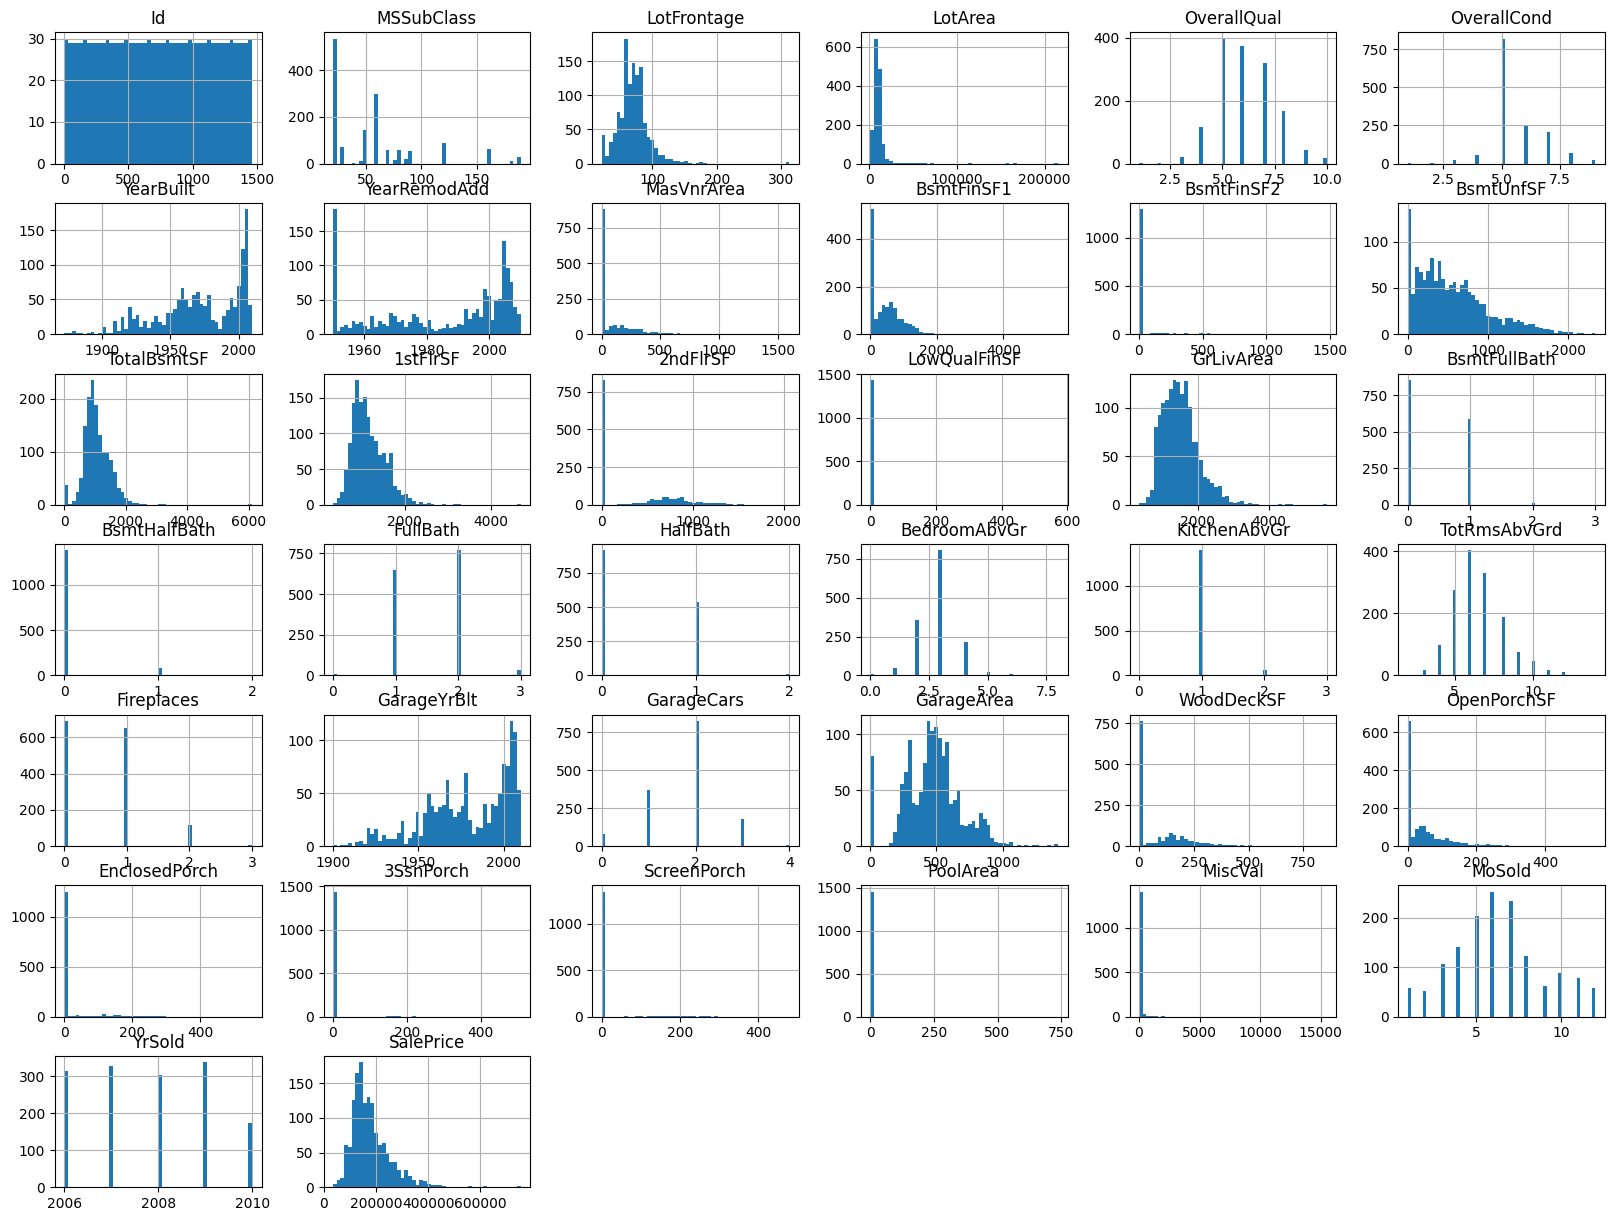

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data_raw.hist(bins=50, figsize=(20,15))
plt.show()

# Train/Test Split


## Random Sampling

In [311]:
from sklearn.model_selection import train_test_split

# train_set, test_split = train_test_split(train_data_raw, test_size=0.0000001, random_state=42)
train_set, test_split = train_data_raw, None

# print(f"train: {len(train_set)}, test: {len(test_split)}")

### Experiment StratifiedSampling

In [142]:

# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# list(split.split(train_data_raw, train_data_raw["BldgType"]))[0]

# Data Exploration

In [199]:
num_cols = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold", "SalePrice"]
str_cols = [col for col in list(train_set.columns) if (col not in num_cols) and col != 'Id']

(num_cols, str_cols)

(['LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['MSSubClass',
  'MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',

<Axes: xlabel='YearBuilt', ylabel='OverallQual'>

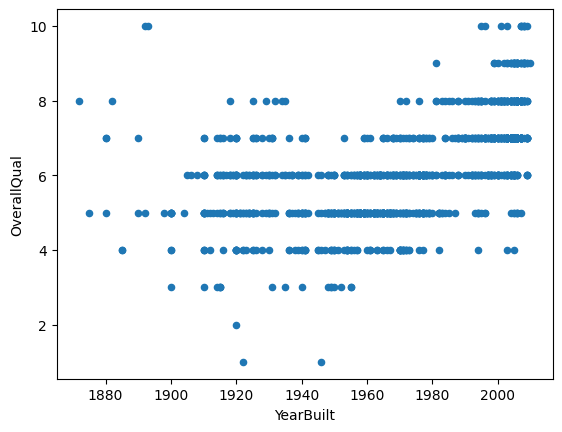

In [144]:
train_set.plot(kind="scatter", y="OverallQual", x="YearBuilt")

<Axes: xlabel='YearRemodAdd', ylabel='OverallQual'>

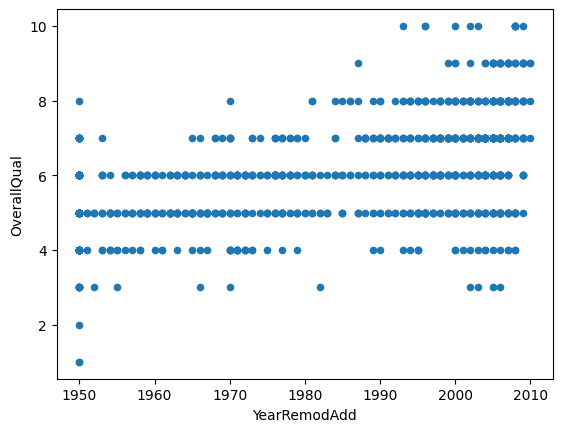

In [145]:
train_set.plot(kind="scatter", y="OverallQual", x="YearRemodAdd")

In [188]:
type(train_set)

corr_matrix = train_set[num_cols].corr()
corr_matrix["OverallQual"].sort_values(ascending=False)

OverallQual      1.000000
SalePrice        0.785555
GarageCars       0.587487
GrLivArea        0.581783
YearBuilt        0.558124
GarageArea       0.550476
FullBath         0.539661
YearRemodAdd     0.538251
TotalBsmtSF      0.529557
GarageYrBlt      0.526937
1stFlrSF         0.463751
TotRmsAbvGrd     0.416332
MasVnrArea       0.416085
Fireplaces       0.384819
BsmtUnfSF        0.330061
2ndFlrSF         0.288717
OpenPorchSF      0.288691
HalfBath         0.266661
LotFrontage      0.249726
WoodDeckSF       0.232991
BsmtFinSF1       0.204864
LotArea          0.102088
BsmtFullBath     0.091070
BedroomAbvGr     0.081399
PoolArea         0.079182
ScreenPorch      0.060840
MoSold           0.053355
3SsnPorch        0.025278
YrSold          -0.017635
LowQualFinSF    -0.023523
MiscVal         -0.032040
BsmtFinSF2      -0.050637
BsmtHalfBath    -0.061374
OverallCond     -0.087599
EnclosedPorch   -0.121967
KitchenAbvGr    -0.188451
Name: OverallQual, dtype: float64

array([[<Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='ScreenPorch', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>,
        <Axes: xlabel='Fireplaces', ylabel='OverallQual'>],
       [<Axes: xlabel='OverallQual', ylabel='ScreenPorch'>,
        <Axes: xlabel='ScreenPorch', ylabel='ScreenPorch'>,
        <Axes: xlabel='YearBuilt', ylabel='ScreenPorch'>,
        <Axes: xlabel='1stFlrSF', ylabel='ScreenPorch'>,
        <Axes: xlabel='Fireplaces', ylabel='ScreenPorch'>],
       [<Axes: xlabel='OverallQual', ylabel='YearBuilt'>,
        <Axes: xlabel='ScreenPorch', ylabel='YearBuilt'>,
        <Axes: xlabel='YearBuilt', ylabel='YearBuilt'>,
        <Axes: xlabel='1stFlrSF', ylabel='YearBuilt'>,
        <Axes: xlabel='Fireplaces', ylabel='YearBuilt'>],
       [<Axes: xlabel='OverallQual', ylabel='1stFlrSF'>,
        <Axes: xlabel='ScreenPorch', ylabel='1stFlrSF'>,
        <Ax

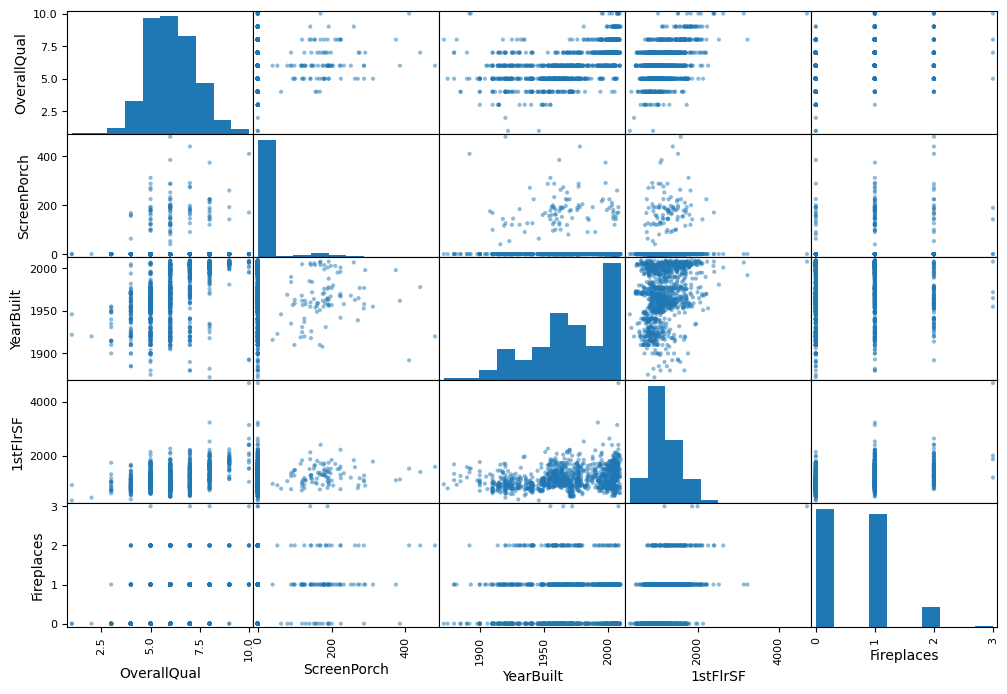

In [189]:
from pandas.plotting import scatter_matrix

cols_of_interest = ["OverallQual", "ScreenPorch", "YearBuilt", "1stFlrSF", "Fireplaces"]

scatter_matrix(train_set[cols_of_interest], figsize=(12,8))

# Preprocessing

In [200]:
housing_vals = train_set["SalePrice"].copy()
train_set_no_ans = train_set.drop("SalePrice", axis=1)

## Fill missing numerical vals with median

In [201]:
from sklearn.impute import SimpleImputer

num_cols_no_ans = [col for col in num_cols if col != "SalePrice"]
training_no_ans = train_set_no_ans[num_cols_no_ans]

imputer = SimpleImputer(strategy="median")
print(training_no_ans.shape)
# training_num_processed = imputer.fit(training_no_ans)
X_num = imputer.fit_transform(training_no_ans)

(1168, 35)


In [202]:
imputer.statistics_

array([7.000e+01, 9.600e+03, 6.000e+00, 5.000e+00, 1.972e+03, 1.994e+03,
       0.000e+00, 3.845e+02, 0.000e+00, 4.800e+02, 9.975e+02, 1.095e+03,
       0.000e+00, 0.000e+00, 1.473e+03, 0.000e+00, 0.000e+00, 2.000e+00,
       0.000e+00, 3.000e+00, 1.000e+00, 6.000e+00, 1.000e+00, 1.980e+03,
       2.000e+00, 4.820e+02, 0.000e+00, 2.700e+01, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 2.008e+03])

## (Slow Way) Replace Categorical vals with onehot

In [99]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# label_enc = LabelEncoder()
# train_str = train_set["MSZoning"]
# train_str_enc = label_enc.fit_transform(train_str)
# train_str_enc_df = pd.DataFrame(train_str_enc, columns=["MSZoning"])
# (type(train_str_enc), train_str_enc, label_enc.classes_)

(numpy.ndarray,
 array([3, 3, 3, ..., 3, 3, 3], shape=(1168,)),
 array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object))

In [100]:
# onehot_enc = OneHotEncoder()
# X_txt = onehot_enc.fit_transform(train_str_enc.reshape(-1, 1))
# # X_txt_df = pd.DataFrame(X_txt, columns=str_cols)
# X_txt.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], shape=(1168, 5))

## (Fast Way) Replace Categorical vals with OneHottrain_set_no_ans

In [178]:
train_set_no_ans

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [249]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin

class MultiLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols_ = cols
        
    def fit(self, X, y=None):
        if type(X) == np.ndarray:
            X = pd.DataFrame(X, columns=self.cols_)
        self.encoders_ = [None] * len(self.cols_)
        for i, col in enumerate(self.cols_):
            self.encoders_[i] = LabelBinarizer()
            self.encoders_[i].fit(X[col].astype(str))
        return self
    
    def transform(self, X: pd.DataFrame, y=None):
        if type(X) == np.ndarray:
            X = pd.DataFrame(X, columns=self.cols_)
        onehot_encoded_data = [
            enc.transform(X[col].astype(str))
            for col, enc in zip(self.cols_, self.encoders_)
        ]
        return np.concatenate(onehot_encoded_data, axis=1)

print(len(train_set_no_ans))
imputer = SimpleImputer(strategy='most_frequent')
train_str_fixed = imputer.fit_transform(train_set_no_ans[str_cols])

train_str_fixed_df = pd.DataFrame(train_str_fixed, columns=str_cols)
enc = MultiLabelBinarizer(cols=str_cols)
train_str_enc = enc.fit_transform(train_str_fixed_df)
train_str_enc

1168


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0]], shape=(1168, 260))

# Combine all these transformers into one

In [335]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_cols_no_ans = [col for col in num_cols if col != "SalePrice"]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_cols_no_ans)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(str_cols)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_binarizer', MultiLabelBinarizer(str_cols))
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [336]:
train_prepared = full_pipeline.fit_transform(train_set)
print(train_prepared.shape)
housing_vals = train_set["SalePrice"].copy()

(1460, 297)


# Train a model

In [339]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, housing_vals)

LinearRegression()

# Testing model

In [350]:
some_data = train_set.iloc[:5]
some_labels = housing_vals.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(some_data_prepared.shape)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t", some_labels)

(5, 297)
Predictions:	 [209639.12570677 206504.04281205 207685.87810191 166021.05282373
 292032.23163037]
Labels:	 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


## Finding MSE

In [342]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(housing_vals, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(20636.219677239744)

In [343]:
train_set["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Decision Tree

In [344]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, housing_vals)
predictions = tree_reg.predict(train_prepared)
lin_mse = mean_squared_error(housing_vals, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(0.0)

## RandomForestRegressor

In [345]:
from sklearn.ensemble import RandomForestRegressor

rand_tree_reg = RandomForestRegressor()
rand_tree_reg.fit(train_prepared, housing_vals)
predictions = rand_tree_reg.predict(train_prepared)
lin_mse = mean_squared_error(housing_vals, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(11183.26122083177)

## Cross Validation

In [346]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print("# Random Forests")
scores = cross_val_score(rand_tree_reg, train_prepared, housing_vals, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
    
print("\n# Decision Tree")
scores = cross_val_score(tree_reg, train_prepared, housing_vals, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

print("\n# Linear")
scores = cross_val_score(lin_reg, train_prepared, housing_vals, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

# Random Forests
Scores: [25513.66486028 25830.73860999 21649.07654514 38781.8437129
 33560.71966218 25541.97964867 23944.39594135 24983.96955708
 40877.38413694 27662.52797301]
Mean: 28834.630064753972
Standard deviation: 6236.606507033201

# Decision Tree
Scores: [35359.99474427 37998.44772974 34709.33811908 37276.87613297
 38172.30961597 30382.01876708 30047.3112351  37371.68688802
 55867.02156534 37278.553837  ]
Mean: 37446.35586345722
Standard deviation: 6758.032882515361

# Linear
Scores: [25162.95046051 36132.30196734 23599.17986298 41699.54181813
 30699.74257901 43762.20802974 24246.27051665 22704.42955656
 68023.41308346 23215.25119791]
Mean: 33924.52890722857
Standard deviation: 13611.995448230273


# Fine tuning

In [347]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_estimators': [3, 10, 30, 40, 50], 'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
  {'bootstrap': [False], 'n_estimators': [3, 5, 7, 10, 11], 'max_features': [2, 3, 4, 7, 11, 14]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_prepared, housing_vals)
(grid_search.best_params_, grid_search.best_estimator_)

({'max_features': 16, 'n_estimators': 50},
 RandomForestRegressor(max_features=16, n_estimators=50))

In [348]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

46186.609568463464 {'max_features': 2, 'n_estimators': 3}
38578.34866507334 {'max_features': 2, 'n_estimators': 10}
38155.27063121396 {'max_features': 2, 'n_estimators': 30}
37987.15332163438 {'max_features': 2, 'n_estimators': 40}
37380.82304659623 {'max_features': 2, 'n_estimators': 50}
43490.48679147647 {'max_features': 4, 'n_estimators': 3}
38444.15281810862 {'max_features': 4, 'n_estimators': 10}
36168.0186122559 {'max_features': 4, 'n_estimators': 30}
35002.02544374862 {'max_features': 4, 'n_estimators': 40}
35523.54442986511 {'max_features': 4, 'n_estimators': 50}
46803.42328097419 {'max_features': 6, 'n_estimators': 3}
36345.03817203025 {'max_features': 6, 'n_estimators': 10}
34930.0362630613 {'max_features': 6, 'n_estimators': 30}
34126.20132443517 {'max_features': 6, 'n_estimators': 40}
33607.30497368818 {'max_features': 6, 'n_estimators': 50}
42010.27949815666 {'max_features': 8, 'n_estimators': 3}
36950.51206412223 {'max_features': 8, 'n_estimators': 10}
32811.379136705145 

## Find most important features

In [351]:
feature_importances = grid_search.best_estimator_.feature_importances_
all_cats = num_cols_no_ans + str_cols
sorted(zip(feature_importances, all_cats), reverse=True)

[(np.float64(0.07702975708756381), 'OverallQual'),
 (np.float64(0.06559360737103796), 'GrLivArea'),
 (np.float64(0.059186164807601874), 'TotalBsmtSF'),
 (np.float64(0.04696991165765843), 'GarageArea'),
 (np.float64(0.0320677144804078), 'BsmtFinSF1'),
 (np.float64(0.030645417987696696), '1stFlrSF'),
 (np.float64(0.025741911822730352), 'YearBuilt'),
 (np.float64(0.024294854214482013), 'Fireplaces'),
 (np.float64(0.023192638773963), 'FullBath'),
 (np.float64(0.023168966336903997), 'TotRmsAbvGrd'),
 (np.float64(0.022725016343901106), '2ndFlrSF'),
 (np.float64(0.022668981457596448), 'GarageCars'),
 (np.float64(0.022570237989970855), 'OpenPorchSF'),
 (np.float64(0.020889195759106475), 'GarageYrBlt'),
 (np.float64(0.0198992744106596), 'LotArea'),
 (np.float64(0.017744153956116223), 'YearRemodAdd'),
 (np.float64(0.015116667293007669), 'LotFrontage'),
 (np.float64(0.014333682381188038), 'MasVnrArea'),
 (np.float64(0.008958689386656471), 'WoodDeckSF'),
 (np.float64(0.007393162929147252), 'BsmtUn

# Evaluate on the test set

In [327]:
print(f"{test_split.shape=}, {train_set.shape=}")

X_test_prepared = full_pipeline.transform(test_split)
X_train_prepared = full_pipeline.transform(train_set)
print(f"{X_test_prepared.shape=}, {X_train_prepared.shape=}")



AttributeError: 'NoneType' object has no attribute 'shape'

In [291]:
final_model = grid_search.best_estimator_


y_test = test_split["SalePrice"].copy()
X_test_prepared = full_pipeline.transform(test_split)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(35252.33183992886)

In [274]:
test_split

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,30,RM,50.0,5925,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,89471
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
802,803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000


# Get Final Result for Kaggle

In [352]:
test_data_raw = pd.read_csv('home-data-for-ml-course/test.csv')
test_data_raw

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [353]:
(len(test_data_raw.columns), len(train_set.columns))

(80, 81)

In [356]:
final_model = grid_search.best_estimator_

test_data_raw["SalePrice"] = 0
print(test_data_raw.shape)
X_test_prepared = full_pipeline.transform(test_data_raw)
print(X_test_prepared.shape)
final_predictions = final_model.predict(X_test_prepared)
final_predictions

(1459, 81)
(1459, 297)


array([130220.64, 154608.5 , 182706.16, ..., 149795.3 , 121855.18,
       218417.42], shape=(1459,))

In [358]:
final_np = np.concatenate([
    test_data_raw["Id"].values.reshape(-1,1).astype(np.int32), 
    final_predictions.reshape(-1,1)], 
    axis=1)
res = pd.DataFrame(final_np, columns=["Id", "SalePrice"])
res["Id"] = res["Id"].astype(int)
res.to_csv("final.csv", index=False)